## BBH

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import math

In [2]:
bac_vs_lact = pd.read_csv('db_bacillus_vs_lactobacillus.txt', sep="\t", header=None)
header = "qseqid", "sseqid", "evalue", "bitscore", "pident", "length"
bac_vs_lact.columns = header

lact_vs_bac = pd.read_csv('db_lactobacillus_vs_bacillus.txt', sep="\t", header=None)
header = "qseqid", "sseqid", "evalue", "bitscore", "pident", "length"
lact_vs_bac.columns = header

In [21]:
print(len(bac_vs_lact))
print(len(lact_vs_bac))

28189
56224


In [3]:
#filtering

bl_filtered = bac_vs_lact[(bac_vs_lact.evalue < (1e-5)) & (bac_vs_lact.pident > 30) & (bac_vs_lact.bitscore > 60)]
lb_filtered = lact_vs_bac[(lact_vs_bac.evalue < (1e-5)) & (lact_vs_bac.pident > 30) & (lact_vs_bac.bitscore > 60)]

In [22]:
print(len(bl_filtered))
print(len(lb_filtered))

3225
3202


In [4]:
#create dictionaries with the queryID as the key and the subject/targetID as the value
#these will be used later to loop through them to find pairwise orthologs

bl_dict = {}
lb_dict = {}

def create_dict(dictionary, df):
    for i in range(len(df)):
        dictionary[df.iloc[i]["qseqid"]] = df.iloc[i]["sseqid"]

create_dict(bl_dict, bl_filtered)
create_dict(lb_dict, lb_filtered)


In [5]:
#check that the pairs are in both dictionaries and keep only those
#generate dataframe with all the information of all those tuples

orthologs = pd.DataFrame(columns=header)
for k, v in bl_dict.items():
    if k and v in lb_dict:
        if lb_dict[v] == k:
            orthologs.loc[len(orthologs)] = bl_filtered.loc[bl_filtered[(bl_filtered.qseqid == k) & (bl_filtered.sseqid == v)].index[0]]
    else:
        pass

In [ ]:
#orthologs.to_csv('orthologs.csv', index=False)
#orthologs = pd.read_csv("orthologs.csv")

In [6]:
orthologs

,qseqid,sseqid,evalue,bitscore,pident,length
0,WP_003689399.1,WP_001029884.1,2.020000e-44,134.0,86.111,72
1,WP_003694124.1,WP_000048061.1,4.600000e-31,99.8,94.643,56
2,WP_003695889.1,WP_000918873.1,1.440000e-34,110.0,78.378,74
3,WP_003696792.1,WP_000868344.1,6.990000e-18,65.1,81.081,37
4,WP_003701411.1,WP_000831901.1,6.070000e-20,70.9,81.818,44
...,...,...,...,...,...,...
825,WP_179854464.1,WP_000163123.1,0.000000e+00,595.0,71.970,396
826,WP_179854465.1,WP_086401439.1,9.110000e-167,466.0,64.286,336
827,WP_179854466.1,WP_074555711.1,4.430000e-16,71.2,31.073,177
828,WP_179854468.1,WP_001055366.1,2.960000e-85,251.0,51.417,247


## MEASURING CONSERVATION

In [7]:
#read the file with the orthologous alignments

align = pd.DataFrame(columns = ["protein", "sequence"])

with open("orthologous_clustal_align", "r") as file:
    for line in file:
        data = line.split("/t")
        if len(data) == 2:
            data[1] = data[1].replace("\n", "")
            align.loc[len(align)] = data
        else:
            pass

In [8]:
align

,protein,sequence
0,WP_056959629.1,MANVLRKWVESDKRELKRLGKIADKVEAYADDMEALSDAELKAKTP...
1,WP_003688828.1,MANVLRKWVESDNRELKRLGKIADKVEAYADDMAALSDEELQAKTP...
2,WP_057871480.1,MVNVLKKWVESDKREIKRLGKIADKVEAHAEEMAALSDEELQAQTP...
3,WP_010497931.1,MANVLKKWVESDKRELKRLDKIANKVEAFASDMEAMSDEELQAKTP...
4,WP_056959862.1,MANVLKKWVESDKRELKRLGKIADQVEAYANDMEALSDEELKAKTP...
...,...,...
345,NIA59691.1,EIEQNLERQEVVQGEAVHPSSDGEEAKKKPVVKGDQVGRNDLCKCG...
346,PFW36044.1,EIEQNLERQEVVQGEAVHPSSDGEEAKKKPVVKGDQVGRNDLCKCG...
347,WP_071723526.1,EIEQNLERQEVVQGEAVHPSSDGEEAKKKPVVKGDQVGRNDLCKCG...
348,WP_099684079.1,EIEQNLERQEVVQGEAVHPSSDGEEAKKKPVVKGDQVGRNDLCKCG...


In [9]:
#generate dataframe to add the 25 proteins for the 25 species and their concatenated sequences

alignment = pd.DataFrame(columns = ["protein", "sequence"])

proteins = set(align.protein)

for protein in proteins:
    seq = ""
    for i in range(len(align)):
        if align.protein[i] == protein:
            seq = seq + align.sequence[i]
    alignment.loc[len(alignment)] = [protein, seq]

In [10]:
alignment

,protein,sequence
0,WP_056957328.1,MANVLKKWVESDKRELKRLGKIADKVEAYASDMEALTDEELKAKTP...
1,WP_023859112.1,MANLLKTWVESDKRELKRLGKIADKVESYAAEYEKLSDAELQAKTP...
2,WP_056959862.1,MANVLKKWVESDKRELKRLGKIADQVEAYANDMEALSDEELKAKTP...
3,PFW36044.1,MIGILKKVFDVNQRQIKRMQKTVEQIDALESSIKPLTDEQLKGKTL...
4,WP_003688828.1,MANVLRKWVESDNRELKRLGKIADKVEAYADDMAALSDEELQAKTP...
5,WP_010497931.1,MANVLKKWVESDKRELKRLDKIANKVEAFASDMEAMSDEELQAKTP...
6,WP_089144729.1,MANFLRKWVESDKRELKRLGKIADKVEAYASTMEALSDEELKAKTP...
7,WP_075530507.1,MVNILKKWVESDNRELKRLDKIANKVEAFAQDMAELSDEALQQKTP...
8,WP_056959629.1,MANVLRKWVESDKRELKRLGKIADKVEAYADDMEALSDAELKAKTP...
9,MBD5069440.1,MANVLKKWVESDKRELKRLGKIADKVEAYASDMEALTDEELKAKTP...


Shannon Entropy - Shannon 1948 (Sander & Schneider 1991)
- Pi: fraction of residues of amino acid type i
- M: number of amino acid types (20)

      
Zero for sites with identical distributions and 3.3 for maximally different sites.
A value of 1 means equal division of 2 amino acids.

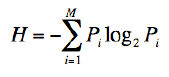

In [11]:
#create columns for all 839 amino acids of every sequence

aa_list = ["protein"]
for i in range(1,840):
    aa_list.append("a" + str(i))
conservation = pd.DataFrame(columns = aa_list)

In [12]:
#generate dataframe with one amino acid per column 

for i in range(len(alignment)):
    aa = ""
    aa = list(alignment.sequence[i])
    conservation.loc[i, conservation.columns == "protein"] = alignment.protein[i]
    conservation.loc[i, conservation.columns != "protein"] = aa

In [13]:
conservation

,protein,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a830,a831,a832,a833,a834,a835,a836,a837,a838,a839
0,WP_056957328.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
1,WP_023859112.1,M,A,N,L,L,K,T,W,V,...,-,-,-,-,-,-,-,-,-,-
2,WP_056959862.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
3,PFW36044.1,M,I,G,I,L,K,K,V,F,...,K,Y,K,N,C,C,G,I,G,K
4,WP_003688828.1,M,A,N,V,L,R,K,W,V,...,-,-,-,-,-,-,-,-,-,-
5,WP_010497931.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
6,WP_089144729.1,M,A,N,F,L,R,K,W,V,...,-,-,-,-,-,-,-,-,-,-
7,WP_075530507.1,M,V,N,I,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
8,WP_056959629.1,M,A,N,V,L,R,K,W,V,...,-,-,-,-,-,-,-,-,-,-
9,MBD5069440.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-


In [14]:
#calculate entropy for each amino acid position
#and add entropies to the last row of the dataframe

entropies = []

for column in range(1,840):
    dic = Counter(conservation[conservation.columns[column]])
    log2 = 0
    for v in dic.values():
        log2 = log2 + (v/25*math.log2(v/25))
    entropies.append(log2*-1)

entrop_row = ["entropies"] + entropies
conservation.loc[len(conservation)] = entrop_row

In [15]:
conservation

,protein,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a830,a831,a832,a833,a834,a835,a836,a837,a838,a839
0,WP_056957328.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
1,WP_023859112.1,M,A,N,L,L,K,T,W,V,...,-,-,-,-,-,-,-,-,-,-
2,WP_056959862.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
3,PFW36044.1,M,I,G,I,L,K,K,V,F,...,K,Y,K,N,C,C,G,I,G,K
4,WP_003688828.1,M,A,N,V,L,R,K,W,V,...,-,-,-,-,-,-,-,-,-,-
5,WP_010497931.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
6,WP_089144729.1,M,A,N,F,L,R,K,W,V,...,-,-,-,-,-,-,-,-,-,-
7,WP_075530507.1,M,V,N,I,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-
8,WP_056959629.1,M,A,N,V,L,R,K,W,V,...,-,-,-,-,-,-,-,-,-,-
9,MBD5069440.1,M,A,N,V,L,K,K,W,V,...,-,-,-,-,-,-,-,-,-,-


In [17]:
print("max entropy: " + str(max(entropies)) + " in " + str(entropies.count(max(entropies))) + " amino acids")
print("min entropy: " + str(min(entropies)) + " in " + str(entropies.count(min(entropies))) + " amino acids")

max entropy: 2.423465189601647 in 1 amino acids
min entropy: -0.0 in 393 amino acids


In [18]:
print(str(393/839*100) + "% of the positions have the exact same amino acid")
print("No positions with an entropy of 3.3, therefore there is some conservation")

46.841477949940405% of the positions have the exact same amino acid
No positions with an entropy of 3.3, therefore there is some conservation


In [19]:
np.quantile(np.array(entropies), [0, 0.25, 0.5, 0.75, 1])

array([-0.        , -0.        ,  0.24229219,  0.97095059,  2.42346519])

the median is 0.24, this means that have of the values are less than 0.24. <br>
75th quantile means that 75% of the entropy scores are less than 0.97, meaning that most of the sites have a very conserved amino acids they either have 1 or 2 different amino acids, therefore very conserved